# Flipkart Headphones

Model: The model of the headphone.

Company: The company manufacturing the headphone.

Color: The color of the headphone.

Type: The type of the headphone (e.g., On the Ear, In the Ear, etc.).

Average Rating: The average rating of the headphone.

Number of Ratings: The number of ratings the headphone has received.

Selling Price: The selling price of the headphone.

Maximum Retail Price: The maximum retail price of the headphone.

Discount: The discount offered on the headphone.

In [1]:
import pandas as pd

In [2]:
# Load the data
data_flipkart = pd.read_csv('https://raw.githubusercontent.com/YBIFoundation/Dataset/main/Flipkart%20Headphones.csv')

In [20]:
# Display the first few rows
data_flipkart.head()

,Model,Company,Color,Type,Average Rating,Number of Ratings,Selling Price,Maximum Retail Price,Discount,Good Rating
0,5PLUS 5PHP28 Wired without Mic Headset,5PLUS,Red,On the Ear,3.6,101,496,3399,2903,0
1,A R Wireless compatible with Headset Bluetooth...,A R,Red,Multicolor,3.9,35280,188,799,611,0
2,Aerizo Wireless Touch R100 Earbuds (Black) Blu...,Aerizo,Black,True Wireless,4.0,1934,589,1298,709,0
3,Allmusic powerful driven bass with dynamic bea...,Allmusic,Multicolor,In the Ear,4.0,15841,260,1599,1339,0
4,Allmusic OPP.O Ultra HD Sound Premium Bass Spo...,Allmusic,Black,In the Ear,3.8,10766,270,999,729,0


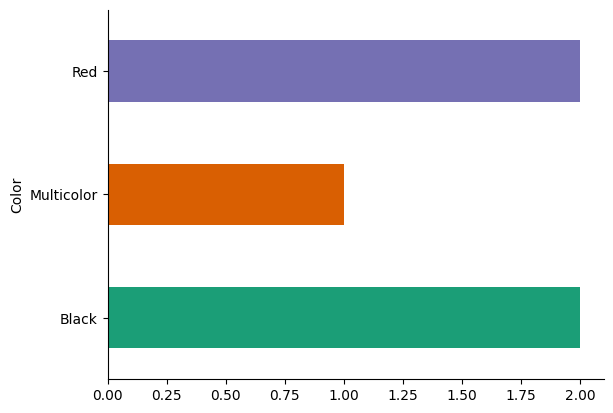

In [21]:
from matplotlib import pyplot as plt
import seaborn as sns
_df_6.groupby('Color').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [4]:
# Display the first few rows
data_flipkart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model                 1000 non-null   object 
 1   Company               1000 non-null   object 
 2   Color                 1000 non-null   object 
 3   Type                  1000 non-null   object 
 4   Average Rating        1000 non-null   float64
 5   Number of Ratings     1000 non-null   int64  
 6   Selling Price         1000 non-null   int64  
 7   Maximum Retail Price  1000 non-null   int64  
 8   Discount              1000 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 70.4+ KB


In [5]:
# Display the first few rows
data_flipkart.describe()

,Average Rating,Number of Ratings,Selling Price,Maximum Retail Price,Discount
count,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000
mean,3.831000,5.004075e+04,832.875000,2423.043000,1590.168000
std,0.467459,1.572297e+05,812.535141,1774.025318,1341.379254
min,1.000000,0.000000e+00,88.000000,0.000000,-2991.000000
25%,3.600000,1.167500e+02,349.000000,1079.750000,697.500000
50%,3.900000,1.712000e+03,599.000000,1999.000000,1390.500000
75%,4.000000,1.332700e+04,999.000000,2999.000000,2250.000000
max,5.000000,1.299042e+06,7990.000000,16999.000000,12000.000000


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [7]:
# Create target variable
data_flipkart['Good Rating'] = (data_flipkart['Average Rating'] > 4.0).astype(int)

In [8]:
# Drop the original Average Rating column
X = data_flipkart.drop(columns=['Model', 'Average Rating', 'Good Rating'])
y = data_flipkart['Good Rating']

In [9]:
# Identify categorical and numerical columns
categorical_cols = ['Company', 'Color', 'Type']
numerical_cols = [col for col in X.columns if col not in categorical_cols]


In [10]:
# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ])

In [11]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [13]:
# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols) # Handle unknown categories
    ])

In [14]:
# Preprocess the data
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score

In [16]:
# Train the Logistic Regression model
model = LogisticRegression(random_state=42)
model.fit(X_train_processed, y_train)


LogisticRegression(random_state=42)

In [17]:
# Make predictions
y_pred = model.predict(X_test_processed)

In [18]:
# Calculate accuracy and precision
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)


In [19]:
accuracy, precision

(0.775, 0.8333333333333334)